<a href="https://colab.research.google.com/github/swanscodex/swanscodex/blob/main/swanscodex_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours
- Tuning K Hyperparameter with Cross-Validation
 
_Next: Feature Engineering using Decision Tree for High Dimensional Datasets_

**Soowan Choi** 

# 1) Problem
a. Classification 
  - flower: iris-setosa, iris-versicolor, iris-virginica   

b. Explore
  - 150 samples (rows), 4 features (columns), 1 target (column)
  - balanced class: 50 iris-setosa, 50 iris-versicolor, 50 iris-virginica    
  - no missing values   


Reference: https://www.kaggle.com/datasets/uciml/iris



In [942]:
#load the dataset
import pandas as pd     #for data organization
url = 'https://raw.githubusercontent.com/swanscodex/swanscodex/main/Iris.csv'   #github url to csv file
df = pd.read_csv(url)   #stored as dataframe

In [943]:
#how many samples and features?
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns in this dataset \n')
df.head()               #prints the first 5 rows of data

there are 150 rows and 6 columns in this dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [944]:
#how many samples of each class?
print(f'there are {len(df.Species.unique())} types of flowers to classify in this dataset: \n')

#print the names of each class and sample length
for i in range(len(df.Species.unique())):
  print(f'{i+1} = {df.Species.unique()[i]}, sample data = {len(df[df.Species == df.Species.unique()[i]])}')  

there are 3 types of flowers to classify in this dataset: 

1 = Iris-setosa, sample data = 50
2 = Iris-versicolor, sample data = 50
3 = Iris-virginica, sample data = 50


In [945]:
#data statistics
df.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [946]:
#how many missing values in dataset?
df.info()   #no missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 2) Data
a. Clean   
b. Xy Split   
c. Test/Train Split    
d. Standardize 

In [947]:
#convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

mappings = list()          #create an empty list to create dictionary mapping categorical to numerical values
encoder = LabelEncoder()   #create an instance of label encoder

df['Species'] = encoder.fit_transform(df['Species'])                           #encode to numerical values
mappings_dict = {index: label for index, label in enumerate(encoder.classes_)} #create a dictionary for mapping categorical to numerical values
mappings.append(mappings_dict)                                                 #store dictionary for each column into single list

df.head()                  #show the encoded dataframe 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [948]:
print(df.columns[-1],'=',mappings[0])       #print the column names and the associated dictionary mapping

Species = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [949]:
#Xy split
feature_data = df.iloc[:, 1:-1]     #split dataframe to get feature data X
target_data = df.iloc[:,-1]         #split dataframe to get target data y

In [950]:
feature_data.head(3)                #show the split dataframe of feature data X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [951]:
#test/train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size = 0.2, random_state=1)  #train set = 80%, test set = 20%

In [952]:
len(X_test) / len(df)    #test set is split such that it is 20% of the entire dataset

0.2

In [953]:
#standardize 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)  #fit the scaler on TRAINING dataset only 
#(do not use test set as it leaks info on test data distribution and could lead to overestimating the model performance)

X_train_sc = scaler.transform(X_train)  #transform train/test set with the scaler
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns, index = X_train.index) #convert scaled train/test sets to dataframe
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns, index = X_test.index)

X_train_sc = X_train_sc.dropna() #drop null values
X_test_sc = X_test_sc.dropna()

#X_train_sc.std(axis='index')                                #to verify standard deviation for each column is 1
X_train_sc.mean(axis='index')                                #to verify mean for each column is 0 

SepalLengthCm    5.421589e-16
SepalWidthCm    -2.988350e-16
PetalLengthCm   -1.128727e-16
PetalWidthCm     1.202742e-16
dtype: float64

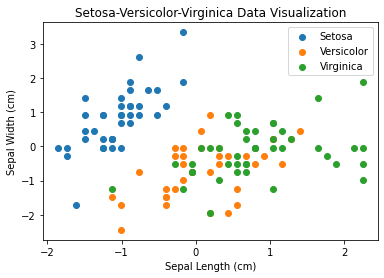

In [954]:
#visualize data
import matplotlib.pyplot as plt

#combine features and targets of training data into single dataframe for visualization
df_visual = X_train_sc.join(y_train)

setosa = df_visual.where(df_visual.Species == 0)    #only setosa data
versi = df_visual.where(df_visual.Species == 1)     #only versicolor data
virgi = df_visual.where(df_visual.Species == 2)     #only virginica data

plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], label="Setosa")            #Compare same two features for each class
plt.scatter(versi['SepalLengthCm'], versi['SepalWidthCm'], label="Versicolor")
plt.scatter(virgi['SepalLengthCm'], virgi['SepalWidthCm'], label="Virginica")                 
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Setosa-Versicolor-Virginica Data Visualization");

# 3) Model: KNN Classifier
a. Cross Validate (Fit, Train, Predict -> Parameter)   
b. Evaluate using Test Data

Text(0.5, 1.0, 'Cross-Val Validation Accuracy (Mean) vs k-Neighbours')

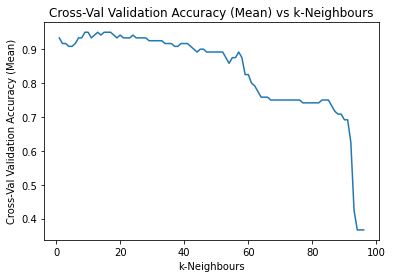

In [955]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate            #import the cross validation score function from the sklearn library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

k = range(1,101)                                              #sweep through k(number of neighbours) from 1 to 100
scores_train = []                                             #create an empty list to store the training accuracy score from cross validation
scores_val = []                                               #create an empty list to store the validation accuracy score from cross validation  
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)                   #parameter - tune the hyperparameter k in knn
  scores = cross_validate(knn, X_train.iloc[:,:-1], y_train, cv=5, return_train_score = True) #split training data into 5-fold TRAIN/VALIDATION set
  scores_train.append(scores['train_score'].mean())           #store the mean training accuracy from cross-validation into the list
  scores_val.append(scores['test_score'].mean())              #store the mean validation accuracy from cross-validation into the list

plt.plot(k,scores_val)                                        #plot only the validation accuracy with the changing k neighbour parameter             

plt.xlabel("k-Neighbours")                                    #label the graph
plt.ylabel("Cross-Val Validation Accuracy (Mean)")
plt.title("Cross-Val Validation Accuracy (Mean) vs k-Neighbours")

In [956]:
print("Max cross val validation accuracy is {}% at k parameter of {}".format(round(max(scores_val)*100,2),scores_val.index(max(scores_val))+1))

Max cross val validation accuracy is 95.0% at k parameter of 9


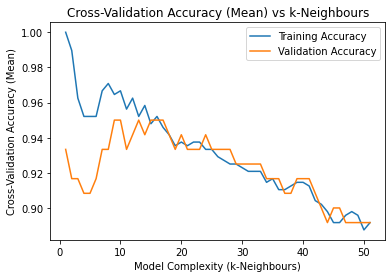

In [957]:
#plot training score accuracy and validation score accuracy to find optimal range of k values:
plt.plot(k[0:51],scores_train[0:51], label = 'Training Accuracy')      #plot the first 50 training score accuracy with model complexity
plt.plot(k[0:51],scores_val[0:51], label = 'Validation Accuracy')      #plot the first 50 validation score accuracy with model complexity

plt.legend()                                                           #add legend and label the graph
plt.xlabel("Model Complexity (k-Neighbours)")
plt.ylabel("Cross-Validation Accuracy (Mean)")
plt.title("Cross-Validation Accuracy (Mean) vs k-Neighbours")
plt.show()

**From the graph above, the k values between 0 to 15 seems to overfit the data (high training accuracy but low validation accuracy), whereas the k values greater than 18 seems to underfit the data as both training and validation accuracy decrease (below ~95%).**

In [958]:
for j in range(1,100):
  if scores_val[j] > 0.93 and scores_val[j] > scores_train[j]:   #we want validation accuracy to be larger than training to avoid overfitting
    print("at k = {}, cross val validation accuracy = {}% and training accuracy = {}%".format(j+1, round(scores_val[j]*100,2), round(scores_train[j]*100,2)))

at k = 15, cross val validation accuracy = 95.0% and training accuracy = 94.79%
at k = 17, cross val validation accuracy = 95.0% and training accuracy = 94.58%
at k = 18, cross val validation accuracy = 94.17% and training accuracy = 94.17%
at k = 20, cross val validation accuracy = 94.17% and training accuracy = 93.75%
at k = 24, cross val validation accuracy = 94.17% and training accuracy = 93.33%
at k = 26, cross val validation accuracy = 93.33% and training accuracy = 92.92%
at k = 27, cross val validation accuracy = 93.33% and training accuracy = 92.71%
at k = 28, cross val validation accuracy = 93.33% and training accuracy = 92.5%


**The best k-Neighbour parameter from cross validation seems to be 15, as it produced the highest validation accuracy of 95.0% without overfitting/underfitting the data.** 

**Bias-Variance tradeoff:** 
- **a low k-Neighbour value would result in high variance but low bias, as the model complexity increases with lower k-Neighbours.** 
- **a high k-Neighbour value would result in low variance but high bias, as the model complexity decreases with higher k-Neighbours.** 

**This is a tradeoff as high variance leads to overfitting (training accuracy >>> validation accuracy) vs a high bias leads to underfitting (low training and validation accuracy).**

In [959]:
#evaluate model:
#highest validation acccuracy of 95.0% with k=15 and # of features = 4 using standardized data on KNN model
import numpy as np
knn = KNeighborsClassifier(n_neighbors=15)             #fit the model: tune the hyperparameter k in knn
knn.fit(X_train_sc,y_train)                            #train the model using training data
knn.predict(X_test_sc)                                 #test the model using held out test set

accuracy = np.sum(y_test == knn.predict(X_test_sc)) / y_test.size
print ("Accuracy: ", round(accuracy * 100,2), "%")

Accuracy:  96.67 %


In [960]:
#using scikit-learn's customized function to test accuracy:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, knn.predict(X_test_sc))
accuracy = round(accuracy*100,2)
print ("Accuracy: ", accuracy, "%")

Accuracy:  96.67 %


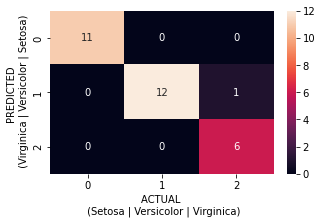

In [961]:
#confusion matrix to visualize correct predictions
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test_sc)
con_mat = confusion_matrix(y_test,y_predicted)

%matplotlib inline
import seaborn as sea
plt.figure(figsize=(5,3))
sea.heatmap(con_mat,annot=True)
plt.ylabel('PREDICTED \n (Virginica | Versicolor | Setosa)')
plt.xlabel('ACTUAL \n (Setosa | Versicolor | Virginica)')
plt.show()

**The best k-Neighbours for this Iris Species dataset was found to be 15, which produced the highest validation score of 95.0%.**

**Using k-Neighbours of 15 with 4 features on the unseen test dataset, the testing score results in 96.67%.** 
- **However, note that due to the small sample size, the optimal k-Neighbours might not be an accurate representation** 
  - **e.g., k=3 seems to produce testing score of 100%, even though it produced a lower validation score of 91.67%**
  - **e.g., k=15: testing score = 96.67% (validation score = 95%)**

**Note: Accuracy % can be used to evaluate this model (instead of F1 Score or AUC) as this is a balanced dataset (50 samples for each flower)**

**To predict on out-of-sample data, we use the entire dataset (Not the X_train, y_train split dataset) as more data creates a more accurate model.**

**We set the k-Neighbours to 15**

In [962]:
#to predict using individual flower features (out-of-sample data)
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(feature_data,target_data)
knn.predict([[6.7,3,4,1]])

array([1])